In [28]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
import requests
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE, SelectKBest, chi2
import gc
from sklearn.linear_model import LinearRegression
# from tensorflow.keras.layers import *
# import tensorflow as tf


In [2]:
train_features = pd.read_csv('./X_train.csv')
train_targets = pd.read_csv('./y_train.csv')
test_data = pd.read_csv('./X_test.csv')

In [3]:
# train_data = train_data.drop(['id', 'Moons'], axis=1)
# test_data = test_data.drop(['id', 'Moons'], axis=1)
# train_targets = train_targets.drop(['id', 'Moons'], axis=1)

In [4]:
train_features.head()

,id,Moons,wrythm_Feature_1,wrythm_Feature_2,wrythm_Feature_3,wrythm_Feature_4,wrythm_Feature_5,wrythm_Feature_6,wrythm_Feature_7,wrythm_Feature_8,...,vratios_Feature_108,vratios_Feature_109,vratios_Feature_110,vratios_Feature_111,vratios_Feature_112,vratios_Feature_113,vratios_Feature_114,vratios_Feature_115,vratios_Feature_116,vratios_Feature_117
0,152637,0,0.83,0.67,1.00,0.67,0.33,0.50,0.17,0.17,...,0.17,0.33,0.67,0.83,0.83,0.67,0.50,0.50,0.50,0.67
1,135698,0,0.50,0.50,0.17,0.17,0.33,0.33,0.50,0.50,...,1.00,1.00,0.67,0.33,0.50,0.50,0.83,0.83,0.33,0.67
2,135696,0,0.67,0.67,0.33,0.33,0.33,0.67,0.50,0.50,...,0.33,0.00,0.83,0.33,0.33,0.50,0.50,0.17,0.33,0.50
3,231707,0,0.33,0.83,0.17,0.33,0.17,0.00,1.00,0.50,...,1.00,1.00,0.83,0.17,0.17,0.17,0.67,0.67,0.00,0.83
4,22688,0,0.33,1.00,0.33,0.50,0.50,0.67,0.67,0.50,...,0.33,0.17,0.50,0.33,0.17,0.17,0.17,0.33,0.50,0.67


In [5]:
train_targets.head()

,id,Moons,target_w,target_r,target_g,target_b
0,152637,0,0.50,0.17,0.50,0.33
1,135698,0,0.67,0.50,0.67,0.50
2,135696,0,0.33,0.50,0.50,0.33
3,231707,0,0.50,0.17,0.50,0.33
4,22688,0,0.50,0.67,0.83,0.67


In [6]:
test_data.head()

,id,Moons,wrythm_Feature_1,wrythm_Feature_2,wrythm_Feature_3,wrythm_Feature_4,wrythm_Feature_5,wrythm_Feature_6,wrythm_Feature_7,wrythm_Feature_8,...,vratios_Feature_108,vratios_Feature_109,vratios_Feature_110,vratios_Feature_111,vratios_Feature_112,vratios_Feature_113,vratios_Feature_114,vratios_Feature_115,vratios_Feature_116,vratios_Feature_117
0,111397,358,0.17,0.50,0.67,0.83,0.17,0.83,0.50,0.33,...,0.67,0.83,0.67,0.33,0.67,0.50,0.67,1.00,0.50,0.50
1,111329,358,0.17,0.67,0.67,0.50,0.17,0.17,0.83,0.50,...,0.50,0.50,0.50,0.50,0.83,0.83,0.50,0.67,0.50,0.67
2,223798,358,0.33,0.50,0.50,0.50,0.50,0.33,0.33,0.67,...,0.33,0.33,0.83,0.67,1.00,1.00,0.83,0.50,0.50,0.83
3,178816,358,0.83,0.50,0.17,0.17,0.83,0.17,1.00,0.17,...,0.33,0.00,0.83,0.17,0.33,0.50,0.33,0.00,0.17,0.67
4,297884,358,0.33,0.33,0.83,0.50,0.50,0.67,0.33,0.50,...,0.67,0.50,0.33,0.50,0.50,0.50,0.67,0.50,0.50,0.33


In [7]:
# Merge train_features and train_targets for ease of use
train_data = pd.merge(train_features, train_targets, on=['id', 'Moons'], how='inner')

del train_features, train_targets
gc.collect()

0

In [8]:
# Get the features columns name  and the targets columns name
features = [col for col in train_data.columns if 'Feature' in col]
targets = [col for col in train_data.columns if 'target' in col]

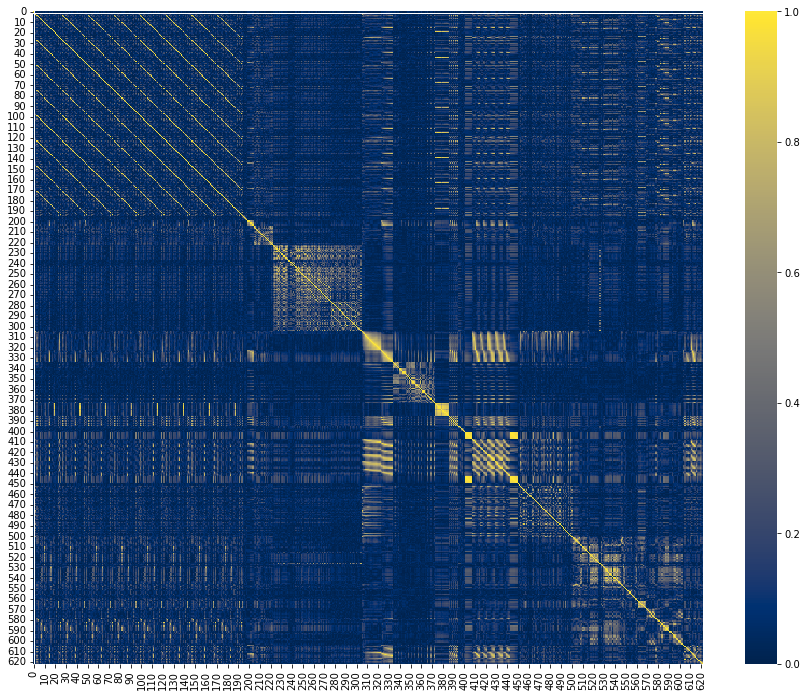

In [27]:
def show_cov(x):
    cov = x.corr().abs().to_numpy()
    plt.figure(figsize=(15, 12))
    sns.heatmap(cov,vmin=0, vmax=1, cmap="cividis")
    plt.show()

# Show last moon covariance matrix
train_data_last = train_data[train_data['Moons'] == train_data['Moons'].max()]
show_cov(train_data_last)

# Modeling



In [53]:
def xg_boost_template(X_train, y_train, X_test, y_test, test_refs, target):
    #model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=3, learning_rate=0.01, n_estimators=50, n_jobs=-1, colsample_bytree=0.5)
    
    #model.fit(X_train, y_train[target], verbose=True)
    model = LinearRegression()
    model.fit(X_train, y_train[target])

    # Test the spearman of your model on the X_test data
    preds = pd.DataFrame(model.predict(X_test), columns=[target])
    spearman = get_spearman_results(preds, y_test, test_refs)
    

    return model

In [54]:
mean = []

def get_spearman_results(preds, y_test, test_refs):
    preds.rename({f'{target}':f'pred_{target.split("_")[1]}' for target in preds.columns}, axis=1, inplace=True)
    preds_ref = pd.concat([preds.reset_index(drop=True), test_refs.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
    spearman = pd.DataFrame()
    
    target_suffixes = [col.split('_')[-1] for col in preds.columns if 'pred' in col]
    for suffix in target_suffixes:
        spearman[f'target_{suffix}'] = preds_ref.groupby('Moons')[[f'pred_{suffix}', f'target_{suffix}']].corr(method='spearman').unstack().iloc[:,1]
    mean.append(spearman.describe())
    print(f'\nSpearman score over the period :\n{spearman.describe()}\n')
    return spearman

In [55]:
def train_test_split(data):
    number_of_moons = len(data['Moons'].unique())
    embargo = 13 # Embargo between train and test set
    proportion = 0.8

    # Train on 80% of the first moons and test on 20% of the last moons
    train_set = data[data['Moons'] < int(number_of_moons * proportion) - embargo]
    test_set = data[data['Moons'] > int(number_of_moons * proportion)]

    X_train = train_set[features]
    y_train = train_set[targets]
    X_test = test_set[features]
    y_test = test_set[targets]
    test_refs = test_set.iloc[:, :2]

    return X_train, y_train, X_test, y_test, test_refs

In [56]:
# Split your data to test your model
X_train, y_train, X_test, y_test, test_refs = train_test_split(train_data)

In [57]:
# Run your model on the different targets
model = {}
for target in targets:
  model[f'xgb_model_{target}'] = xg_boost_template(X_train, y_train, X_test, y_test, test_refs, target)


Spearman score over the period :
        target_w
count  71.000000
mean    0.000114
std     0.114457
min    -0.286492
25%    -0.081820
50%     0.009295
75%     0.068262
max     0.297762


Spearman score over the period :
        target_r
count  71.000000
mean    0.009763
std     0.109576
min    -0.176711
25%    -0.059515
50%    -0.013756
75%     0.083435
max     0.350175


Spearman score over the period :
        target_g
count  71.000000
mean    0.014756
std     0.101627
min    -0.202721
25%    -0.063757
50%     0.010569
75%     0.078806
max     0.265036


Spearman score over the period :
        target_b
count  71.000000
mean   -0.006370
std     0.095539
min    -0.214123
25%    -0.073655
50%    -0.004510
75%     0.061992
max     0.222134



In [59]:
mean[0]

,target_w
count,71.000000
mean,0.000114
std,0.114457
min,-0.286492
25%,-0.081820
50%,0.009295
75%,0.068262
max,0.297762


In [60]:
mean[1]

,target_r
count,71.000000
mean,0.009763
std,0.109576
min,-0.176711
25%,-0.059515
50%,-0.013756
75%,0.083435
max,0.350175


In [61]:
mean[2]

,target_g
count,71.000000
mean,0.014756
std,0.101627
min,-0.202721
25%,-0.063757
50%,0.010569
75%,0.078806
max,0.265036


In [62]:
mean[3]

,target_b
count,71.000000
mean,-0.006370
std,0.095539
min,-0.214123
25%,-0.073655
50%,-0.004510
75%,0.061992
max,0.222134


# Features Selection

## Using RFE

In [14]:
# def rfe_selection(model, test_data_input, train_data_input, target):

#     print('\nSelecting features...')
#     recur = RFE(estimator = model, n_features_to_select = 15)
#     features = recur.fit(train_data_input, target)

#     # print(f'Number of features: {features.n_features_} ')
#     # print(f'Selected Features are: {features.support_}')
#     # print(f'Features rangking is as follows: {features.ranking_}')
#     new_features = []

#     print('Create new features...')
#     for i, v in enumerate(features.support_):
#         if v == True:
#             new_features.append(train_data_input.columns[i])
    
#     new_train_data = train_data_input[new_features]
#     #print(new_train_data.columns)
#     new_test_data = test_data_input[new_features]
#     #print(new_test_data.columns)

#     # print('Modeling with new features...')
#     # model = xg_boost_hackathon(model, new_train_data, target)


#     return new_test_data, new_train_data



In [15]:
# test_data_r, train_data_r = rfe_selection(model, test_data, train_data, train_targets.target_r)
# test_data_g, train_data_g= rfe_selection(model, test_data, train_data, train_targets.target_g)
# test_data_b, train_data_b= rfe_selection(model, test_data, train_data,train_targets.target_b)

In [16]:
# test_data_r.columns

In [17]:
# train_data_r.columns

In [18]:
# rfe_model_r= xg_boost_hackathon(model, train_data_r, train_targets.target_r)
# rfe_model_g= xg_boost_hackathon(model, train_data_g, train_targets.target_g)
# rfe_model_b= xg_boost_hackathon(model, train_data_b, train_targets.target_b)

# Using Chi Score

In [19]:
# chi2_selector = SelectKBest(chi2, k=50)

In [20]:
# x_best = chi2_selector.fit_transform(train_data, train_targets.target_r.astype('int'))

In [21]:
# x_best.shape

In [22]:
# model_target_r_chi= xg_boost_hackathon(model, x_best, train_targets.target_r)
# model_target_g_chi= xg_boost_hackathon(model,x_best, train_targets.target_g)
# model_target_b_chi= xg_boost_hackathon(model, x_best, train_targets.target_b)

# make a prediction

In [63]:
prediction = test_data.iloc[:, :2]
for target in targets:
    prediction.loc[:, target] = model[f'xgb_model_{target}'].predict(test_data.iloc[:, 2:])

In [64]:
prediction

,id,Moons,target_w,target_r,target_g,target_b
0,111397,358,0.489168,0.470647,0.458828,0.456192
1,111329,358,0.507726,0.524168,0.548551,0.539868
2,223798,358,0.485387,0.484309,0.455219,0.451244
3,178816,358,0.509234,0.503333,0.538473,0.514744
4,297884,358,0.500429,0.483340,0.469953,0.457931
...,...,...,...,...,...,...
10657,167175,370,0.510615,0.487635,0.459859,0.458490
10658,148159,370,0.478870,0.477607,0.470057,0.480630
10659,153147,370,0.486092,0.451568,0.394135,0.399190
10660,45199,370,0.502221,0.528764,0.534658,0.542537


In [25]:
# # Check the validity of your prediction dataframe

# for moon in prediction['Moons'].unique():
#     # Check if you have the same id than in the example_submission
#     if not set(prediction[prediction['Moons'] == moon]['id'].unique()) == set(exemple_submission[exemple_submission['Moons'] == moon]['id'].unique()):
#         print('Your dataframe does not contain the ids required for each moon')
#     for target in targets:
#         # Check if you have constants for each moon and each target
#         if prediction[prediction['Moons'] == moon][target].nunique() == 1:
#             print(f'Your submission contains constant values on moon : {moon}')

# # Check if your columns are well named
# if prediction.columns.tolist() != exemple_submission.columns.tolist():
#     print('Your columns name does not match the exemple_submission columns')

# # Check if your values are between 0 and 1
# if (prediction.iloc[:, 2:].values > 1).any() or (prediction.iloc[:, 2:].values < 0).any():
#     print('At least one value is higher than 1 or lower than 0')

In [65]:
API_KEY = "YYfrN3aJ55zuDzMliIfSQEJQ3NWYoSj7bndvMAOzGy4zZVggZo2hP0D2nHpU" # <- enter your API key HERE

## new version
r = requests.post(
    "https://api.tournament.crunchdao.com/v2/submissions",
    params={
        "apiKey": API_KEY,
    },
    files={
        "file": ("x", prediction.to_csv(index=False).encode('ascii'))
    },
)

if r.status_code == 200:
    print("Submission submitted.")
elif r.status_code == 423:
    print("ERR: Submissions are close")
    print("You can only submit during rounds eg: Friday 7pm GMT+1 to Sunday midnight GMT+1.")
    print("Or the server is currently crunching the submitted files, please wait some time before retrying.")
elif r.status_code == 422:
    print("ERR: API Key is missing or empty")
    print("Did you forget to fill the API_KEY variable?")
elif r.status_code == 400:
    print("ERR: The file must not be empty")
    print("You have send a empty file.")
elif r.status_code == 401:
    print("ERR: Your email hasn't been verified")
    print("Please verify your email or contact a cruncher.")
elif r.status_code == 409:
    print("ERR: Duplicate submission")
    print("Your work has already been submitted with the same exact results, if you think that this a false positive, contact a cruncher.")
    print("MD5 collision probability: 1/2^128 (source: https://stackoverflow.com/a/288519/7292958)")
elif r.status_code == 429:
    print("ERR: Too many submissions")
else:
    print("ERR: Server returned: " + str(r.status_code))
    print("Ouch! It seems that we were not expecting this kind of result from the server, if the probleme persist, contact a cruncher.")

Submission submitted.
